## Final Project Submission

* Student name: Marvin Mills
* Student pace: part-time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL:


# Getting Started
To start, I'll import everything I see as necessary to get this done. I've imported the usual suspects -- pandas, numpy, matplotlib -- but also, I'll be importing "Time" to do API request rests as well as "Locale" and "FuncFormatter" which I'm hoping both will help with displaying currency on the visualizations.

Moreover, I'll be primarily, if not exclusively, using <b>TMDBSimple</b> to complete this research & recommendation for Microsoft. I've also gone ahead and found out how to call my API key without showing my API key here in the notebook. It also shouldn't show when I push to Github.

In [109]:
import emoji
print(emoji.emojize("Let's get started!!!" ":thumbs_up:"))

Let's get started!!!👍


In [110]:
#Importing all of the important items here
import pandas as pd
import numpy as np
import locale
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tickie
import squarify
import seaborn as sns
from matplotlib.ticker import FuncFormatter
locale.setlocale( locale.LC_ALL, '' )

'English_United States.1252'

In [111]:
#Importing tmdbsimple as well as config so as to keep API Key hidden.
import tmdbsimple as tmdb
import config
tmdb.API_KEY = config.api_key

# Before The Work: Getting To Know The Data + Determining Approach

This first section -- below -- is where I get to know the nature of the data, while using tmdb simple. My goal is to determine what columns there are, and this will help me to decide on which questions I'd like to ask.

In [112]:
#Initial, manual accessing of the dataset per the "response" list found at: 
#https://developers.themoviedb.org/3/movies/get-movie-details

cool = 2
movie = tmdb.Movies(cool)
response = movie.info()

#These represent the diversity of information available for the movies in the database. There is more, of course.
print(movie.title)
print(movie.budget)
print(movie.revenue)
print(movie.release_date)
print(movie.runtime)
print(movie.genres)
print(movie.tagline)
print(movie.status)
print(movie.popularity)
print(movie.overview)

Ariel
0
0
1988-10-21
73
[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}]

Released
12.467
Taisto Kasurinen is a Finnish coal miner whose father has just committed suicide and who is framed for a crime he did not commit. In jail, he starts to dream about leaving the country and starting a new life. He escapes from prison but things don't go as planned...


## *** Accessing The Data ***
The good thing is that I can see clearly what the data looks like. But now, the goal is to figure out how to loop through the data to get this information for <b>1000 movies from the database</b>. I wonder whether I can loop through the data using the "movie.info()" method. When trying to loop through using <b>a range of numbers</b> there is a <b>404 Error</b> that comes up with some numbers. So, I'll need to find a better way.

In [113]:
#cooler = [900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916]
#Used the above to test what happens when looping through the dataset

#NOTE: It's 915 that breaks the code in "cooler" and brings up the 404 error.

#pop_1000_ids is a variable introduced in a cell below to make the code work.
#Prior to this, I was using the "cooler" variable to test the loop, as mentioned above.
#The id's from pop_1000_ids are taken from looping through the "movie.popular()" method (see below)

leggo_my_eggo = pop_1000_ids
shaquille = []
counter = 1

for i in leggo_my_eggo:
    if counter < 20:
        movie = tmdb.Movies(i)
        response = movie.info()
        shaquille.append(response)
        print(movie.title, movie.budget, movie.revenue)
        counter += 1

Project Power 0 0
Deathstroke: Knights & Dragons - The Movie 0 0
Fearless 0 0
Sputnik 0 0
Magic Camp 24000000 0
Joker 55000000 1074251311
Avengers: Infinity War 300000000 2046239637
Work It 0 0
The Secret Garden 0 0
Captain America: Civil War 250000000 1153296293
The King of Staten Island 0 0
Palm Springs 0 164000
Coma 4000000 2363584
Inception 160000000 825532764
Tesla 5000000 0
Terminator Genisys 155000000 440603537
Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn) 75000000 201858461
The Kissing Booth 2 0 0
Scoob! 0 9430580


## Iterating Through The Data: First Attempts

Now, let's use the "movie.popular()" method to loop through the Most Popular films from TMDB. In order to do this effectively, I'll be using "time.sleep" which will make the loop "rest" for a certain period so as not to access the API too quickly (I'm actually not sure whether my request is even considered "too much" but just in case I wanted to use the "time.sleep" option. I also see it as a good habit to form perhaps.

So, what I'll be doing here is:
<br>
<b>Loop through 50 pages of TMDB results, to get 1000 movies.</b>
<br>
I'll add the 1000 movies' info into a list (so it'll be a dictionary within a list), and then store the IDs and the Titles of the films into two different lists, respectively. I'll also check the length of the "popular_dict" list to verify whether there are 1000 entries.



In [114]:
print(type(tmdb.Movies()))

<class 'tmdbsimple.movies.Movies'>


In [115]:
a = tmdb.Movies()
abc = a.popular()

In [116]:
#I found some good insight and guidance for this here: 
#https://spandan-madan.github.io/DeepLearningProject/

popular_dict = []
pop_1000_ids = []
pop_1000_titles = []
for i in (range(1,51)):
    if i%15 == 0:
        time.sleep(7)
    doop = a.popular(page=i)['results']
    popular_dict.extend(doop)

print(doop[1]['title'])
print(popular_dict[1]['title'])
len(popular_dict)

Vertigo
Deathstroke: Knights & Dragons - The Movie


1000

## Successfully Stored Movies Into List. What's Next?

Now, I'll check the data a bit to see what's inside. I'll also run a For Loop to add the Titles and the IDs to their own lists. What I'm hoping to do is to be able to use these to call data from the "movie.info()" method, instead of looping through the data from 0 to 20, for example.
<br>
<b>OK, let's check for what's inside, run the For Loop to store Titles and IDs, as well as verify these as well.</b>

In [117]:
popular_dict[0]

{'popularity': 271.572,
 'vote_count': 430,
 'video': False,
 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg',
 'id': 605116,
 'adult': False,
 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg',
 'original_language': 'en',
 'original_title': 'Project Power',
 'genre_ids': [28, 80, 878],
 'title': 'Project Power',
 'vote_average': 6.8,
 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.',
 'release_date': '2020-08-14'}

In [118]:
doop[0]

{'popularity': 17.443,
 'vote_count': 10598,
 'video': False,
 'poster_path': '/momkKuWburNTqKBF6ez7rvhYVhE.jpg',
 'id': 10528,
 'adult': False,
 'backdrop_path': '/veXdzn7LL0bFIDGmE7tTkvRg0qV.jpg',
 'original_language': 'en',
 'original_title': 'Sherlock Holmes',
 'genre_ids': [28, 12, 80, 9648],
 'title': 'Sherlock Holmes',
 'vote_average': 7.2,
 'overview': 'Eccentric consulting detective, Sherlock Holmes and Doctor John Watson battle to bring down a new nemesis and unravel a deadly plot that could destroy England.',
 'release_date': '2009-12-23'}

In [119]:
#Looping through the dictionary created to append the IDs and Titles to lists.
for i in popular_dict:
    pop_1000_ids.append(i['id'])
    pop_1000_titles.append(i['title'])
print(pop_1000_ids[0:20])
print(pop_1000_titles[0:20])

[605116, 703771, 726664, 594718, 454433, 475557, 299536, 612706, 521034, 271110, 579583, 587792, 430155, 27205, 517412, 87101, 495764, 583083, 385103, 577922]
['Project Power', 'Deathstroke: Knights & Dragons - The Movie', 'Fearless', 'Sputnik', 'Magic Camp', 'Joker', 'Avengers: Infinity War', 'Work It', 'The Secret Garden', 'Captain America: Civil War', 'The King of Staten Island', 'Palm Springs', 'Coma', 'Inception', 'Tesla', 'Terminator Genisys', 'Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)', 'The Kissing Booth 2', 'Scoob!', 'Tenet']


In [120]:
#Checking to see whether this ID matches with the ID above.
popular_dict[5]['id']

475557

## Turning List With Nested Dictionary Into a DataFrame

Now that I have the dictionary-organized data stored as a list (therefore as a dictionary within a list), I'll need to figure out how to create a DataFrame from this type of data (see below for the <b>type</b> of data the variable popular_dict stores as the first entry in the list). It's a <b>dictionary</b> as demonstrated below by checking the "type" of the dataset. So, what I'll do is use this data to create the main DataFrame I'll need.

In [121]:
print(type(popular_dict[0]))
print('---')
print(popular_dict[0].keys())
print('---')
print(popular_dict[0])

<class 'dict'>
---
dict_keys(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult', 'backdrop_path', 'original_language', 'original_title', 'genre_ids', 'title', 'vote_average', 'overview', 'release_date'])
---
{'popularity': 271.572, 'vote_count': 430, 'video': False, 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg', 'id': 605116, 'adult': False, 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg', 'original_language': 'en', 'original_title': 'Project Power', 'genre_ids': [28, 80, 878], 'title': 'Project Power', 'vote_average': 6.8, 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.', 'release_date': '2020-08-14'}


In [122]:
#Just in case I need to set columns at some point perhaps this will come in handy?
main_film_dict_columns = list(popular_dict[0])
main_film_dict_columns

['popularity',
 'vote_count',
 'video',
 'poster_path',
 'id',
 'adult',
 'backdrop_path',
 'original_language',
 'original_title',
 'genre_ids',
 'title',
 'vote_average',
 'overview',
 'release_date']

## Creating The Main DataFrame

OK, now to create the DataFrame and check all of the data a bit. It was a lot simpler than I'd expected.

In [123]:
#Creating the DataFrame from the Dictionary formed in a previous cell.
main_movie_df = pd.DataFrame(popular_dict)
main_movie_df.tail()

popularity  vote_count  video                       poster_path      id  \
995      17.398        5259  False  /ikN5RPNIt26YEMDbsm0rnmNODio.jpg   22970   
996      17.393        1653  False  /b0WwWRcDiDahkah5vZ0KjB4N9ZZ.jpg    8584   
997      17.385         585  False  /Af2jt7m9GLFpR4V11xOsFmT8OKD.jpg  707886   
998      17.374        2379  False  /8kX6xmEwz0RpEJkeWjXTkxbOCAp.jpg    1272   
999      17.352        1530  False  /aYvBiQEaJuoWpIrVBUKmW3NtcK8.jpg   13455   

     adult                     backdrop_path original_language  \
995  False  /5iiVfPS6LsAqmVQVOzhyCHhCFgU.jpg                en   
996  False  /301KcFm1GL3yaTGOO25I0MeAy0W.jpg                en   
997  False  /fZBQOScjDT8TAipEyCkLVeDTu5c.jpg                en   
998  False  /6zKbGvoCrnUuDnTqXJ0laUdWAhd.jpg                en   
999  False  /v2vnLsMZmi1pB3C81c3HfHoA4ZW.jpg                en   

             original_title         genre_ids                   title  \
995  The Cabin in the Woods          [27, 35]  The Cabin in the Woods   
996           Shanghai Noon  [28, 12, 35, 37]           Shanghai Noon   
997           Feel the Beat   [35, 18, 10402]           Feel the Beat   
998                Sunshine         [878, 53]                Sunshine   
999                    Push         [28, 878]                    Push   

     vote_average                                           overview  \
995           6.5  Five college friends spend the weekend at a re...   
996           6.3  Chon Wang, a clumsy imperial guard trails Prin...   
997           7.9  After failing to make it on Broadway, April re...   
998           7.0  Fifty years into the future, the sun is dying,...   
999           6.1  After his father, an assassin, is brutally mur...   

    release_date  
995   2012-04-12  
996   2000-05-26  
997   2020-06-19  
998   2007-04-05  
999   2009-02-04

## Learning From Early Exploration of the Data & Creating DF Copy

It takes time to sift through datasets just right, but I'm glad to actually see this all in dictionary form. I'll be creating a copy of the dictionary as well, just in case.
<br>
<b>Why?</b> I want to be able to explore the DataFrame without concern for mixing something up and compromising my DataFrame.

In [124]:
main_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
popularity           1000 non-null float64
vote_count           1000 non-null int64
video                1000 non-null bool
poster_path          988 non-null object
id                   1000 non-null int64
adult                1000 non-null bool
backdrop_path        977 non-null object
original_language    1000 non-null object
original_title       1000 non-null object
genre_ids            1000 non-null object
title                1000 non-null object
vote_average         1000 non-null float64
overview             1000 non-null object
release_date         1000 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 95.8+ KB


In [125]:
main_movie_df.keys()

Index(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult',
       'backdrop_path', 'original_language', 'original_title', 'genre_ids',
       'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')

In [126]:
copy_mmdf = main_movie_df

In [127]:
copy_mmdf

popularity  vote_count  video                       poster_path      id  \
0       271.572         430  False  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg  605116   
1       128.317          86  False  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg  703771   
2       108.786          19  False  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg  726664   
3        93.255          76  False  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg  594718   
4        92.534          13  False  /awcPLFFYjufRXd2oAAP6ZIXF9vM.jpg  454433   
..          ...         ...    ...                               ...     ...   
995      17.398        5259  False  /ikN5RPNIt26YEMDbsm0rnmNODio.jpg   22970   
996      17.393        1653  False  /b0WwWRcDiDahkah5vZ0KjB4N9ZZ.jpg    8584   
997      17.385         585  False  /Af2jt7m9GLFpR4V11xOsFmT8OKD.jpg  707886   
998      17.374        2379  False  /8kX6xmEwz0RpEJkeWjXTkxbOCAp.jpg    1272   
999      17.352        1530  False  /aYvBiQEaJuoWpIrVBUKmW3NtcK8.jpg   13455   

     adult                     backdrop_path original_language  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                en   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                en   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                en   
3    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                ru   
4    False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg                en   
..     ...                               ...               ...   
995  False  /5iiVfPS6LsAqmVQVOzhyCHhCFgU.jpg                en   
996  False  /301KcFm1GL3yaTGOO25I0MeAy0W.jpg                en   
997  False  /fZBQOScjDT8TAipEyCkLVeDTu5c.jpg                en   
998  False  /6zKbGvoCrnUuDnTqXJ0laUdWAhd.jpg                en   
999  False  /v2vnLsMZmi1pB3C81c3HfHoA4ZW.jpg                en   

                                 original_title         genre_ids  \
0                                 Project Power     [28, 80, 878]   
1    Deathstroke: Knights & Dragons - The Movie          [28, 16]   
2                                      Fearless          [16, 35]   
3                                       Спутник     [18, 27, 878]   
4                                    Magic Camp   [35, 14, 10751]   
..                                          ...               ...   
995                      The Cabin in the Woods          [27, 35]   
996                               Shanghai Noon  [28, 12, 35, 37]   
997                               Feel the Beat   [35, 18, 10402]   
998                                    Sunshine         [878, 53]   
999                                        Push         [28, 878]   

                                          title  vote_average  \
0                                 Project Power           6.8   
1    Deathstroke: Knights & Dragons - The Movie           7.0   
2                                      Fearless           7.3   
3                                       Sputnik           6.3   
4                                    Magic Camp           7.4   
..                                          ...           ...   
995                      The Cabin in the Woods           6.5   
996                               Shanghai Noon           6.3   
997                               Feel the Beat           7.9   
998                                    Sunshine           7.0   
999                                        Push           6.1   

                                              overview release_date  
0    An ex-soldier, a teen and a cop collide in New...   2020-08-14  
1    Ten years ago, Slade Wilson-aka the super-assa...   2020-08-04  
2    A teen gamer is forced to level up to full-tim...   2020-08-14  
3    At the height of the Cold War, a Soviet spacec...   2020-07-14  
4    Andy, at the urging of his former mentor and M...   2020-08-14  
..                                                 ...          ...  
995  Five college friends spend the weekend at a re...   2012-04-12  
996  Chon Wang, a clumsy imperial guard trails Prin...   2000-05-26  
997  After 

#  🧗🏿 🌍 👨🏿‍🚀 My Questions:
OK! So, now it looks like I can start organizing, sorting and harnessing the data according to the questions I'd like to get answers for! 
<br><b>Here are the questions I'll be asking:</b>

<br> <b>First:</b> Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and in which genre are the respective films?

<br> <b>Second:</b> Is there a positive correlation between popularity and income in the last 36 months?

<br> <b>Third:</b> Which 10 non-English language films have the highest popularity score in the last 5 years?

<br> <b>Fourth:</b> How do films that belong to collections fare compared to films not apart of collections?


## <br> *** NOTE: A Word On Why I've Chosen These Questions ***
Upon doing initial research, I learned that, <i>"across all Hollywood studio movies, the average time between the first announcement and eventual release date is 871 days – or two years, four months and nineteen days."</i> What I also learned is that Comedy and Romance films have the shortest time from first announcement to eventual release. Understanding all of this, I think there could be value for Microsoft leadership in understanding first what <b>production companies'</b> activities have been, as related to <b>genre-specific investment</b> and <b>revenue generation.</b>
<br>
<br>
Moreover, <b>popularity</b> assumedly is a key factor in making this decision as well, and so I'll like to investigate which films are the most popular.
<br>
<br>
Lastly, to touch upon the existence of internationally-sourced films, I'll explore non-English language films, or films that have been wildly successful but whose original language is not English. <b>The assumption here is that internationally-sourced films that thrive in today's movie market have had either the investment, ingredients or both to generate "impressive" revenue,</b> and these films could be the types of films Microsoft leadership should consider if or when deciding to launch a movie studio segment. Also, I'll be investigating films with English as their original language and as well, with other languages spoken in the film.
<br>
<br>
Ultimately, the goal is to help Microsoft leadership understand <b>where money is flowing</b>, how popularity feedback provided online correlates to where money is flowing, and at the end, whether starting a movie studio segment makes sense and, <b>providing recommendation on the types of films to focus on.</b>

---

#    🧗🏿 🌍 👨🏿‍🚀  1st Question:
## Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and what's the most prevalent genre among these films?

So, now what I'll do is use my list of IDs I got from "movies.popular()" to pull data from "movies.info()". First, to get a look at the fuller amount of information available I'll look at the first entry. It's clear that there's a whole lot more information available per movie entry.

---

In [128]:

#Getting a look at the data for an entry once more.

leggo_my_eggo = pop_1000_ids
#counts = 1
shaqshaq = []

for j in leggo_my_eggo:
    movie = tmdb.Movies(j)
    response = movie.info()
    shaqshaq.append(response)
        
shaqshaq[0]

{'adult': False,
 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 80, 'name': 'Crime'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.netflix.com/projectpower',
 'id': 605116,
 'imdb_id': 'tt7550000',
 'original_language': 'en',
 'original_title': 'Project Power',
 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.',
 'popularity': 271.572,
 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg',
 'production_companies': [{'id': 102118,
   'logo_path': None,
   'name': 'Screen Arcade',
   'origin_country': 'US'},
  {'id': 71895,
   'logo_path': None,
   'name': 'Supermarché',
   'origin_country': 'US'}],
 'production_countries': [{'iso_3166_1': 'US',
   'name': 'United States of America'}],
 'release_date': '2020-08-14',
 'revenue': 0,
 'runtime': 113,
 'sp

In [129]:
shaqshaq_col_names = list(shaqshaq[0].keys())
shaqshaq_df = pd.DataFrame(shaqshaq,columns=shaqshaq_col_names)
pd.set_option('display.max_columns',None)
shaqshaq_df.head()

adult                     backdrop_path belongs_to_collection    budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
1  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   
2  False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None         0   
3  False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None         0   
4  False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg                  None  24000000   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   

                                       homepage      id     imdb_id  \
0           http://www.netflix.com/projectpower  605116   tt7550000   
1                                                703771  tt12876132   
2        https://www.netflix.com/title/81252403  726664   tt8675288   
3  https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
4                                                454433   tt3979300   

  original_language                              original_title  \
0                en                               Project Power   
1                en  Deathstroke: Knights & Dragons - The Movie   
2                en                                    Fearless   
3                ru                                     Спутник   
4                en                                  Magic Camp   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     271.572   
1  Ten years ago, Slade Wilson-aka the super-assa...     128.317   
2  A teen gamer is forced to level up to full-tim...     108.786   
3  At the height of the Cold War, a Soviet spacec...      93.255   
4  Andy, at the urging of his former mentor and M...      92.534   

                        poster_path  \
0  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg   
1  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
2  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg   
3  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg   
4  /awcPLFFYjufRXd2oAAP6ZIXF9vM.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
2  [{'id': 81139, 'logo_path': None, 'name': 'Van...   
3  [{'id': 100821, 'logo_path': None, 'name': 'Vo...   
4  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   
2           [{'iso_3166_1': 'CA', 'name': 'Canada'}]   2020-08-14        0   
3           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   2020-07-14        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   

   runtime                                   spoken_languages    status  \
0    113.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1     87.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
2     89.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3    113.0           [{'iso_639_1': 'ru', 'name': 'Pусский'}]  Released   
4    100.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  What would you risk for five minutes of pure p...   
1  Never give a paid killer a reason to work for ...   
2                                                      
3          The only survivor did not come back alone   
4                             Welcome to Magic Camp!   

                                        title  video  vote_average  vote_count  
0                               Project Power  F

## Colleting All Production Company Names Together

OK, now that I've taken a look, what I'd like to do next is see if I can collect all the production company names into one list. Moreover, since there's a pretty good chance production companies have worked on numerous if not many films on the list, I'll want to make sure I create a list with <b>unique</b> values.

In [130]:
loopr_pc = shaqshaq_df['production_companies']

#Loop through the production company column for all 1000 movies
#Loop through each production company entry for the length of each of the 1000 movies (# of companies varies)
#Appending the 'name' of each production company to a master list of production companies in the dataset
#Printing the first 10 entries in that list

prod_comp_names = []
cowntr = 1
for p in loopr_pc:
    for i in p:
        prod_comp_names.append(i['name'])
        cowntr += 1
            
pcn = set(prod_comp_names)
unique_prod_companies = list(pcn)
#Leveraging the 'cowntr' to cross-check with the lengh of the list, to verify that a list of unique values is being formed.
print(cowntr)
print('---')
print(len(unique_prod_companies))
print('---')
print(unique_prod_companies)

3513
---
1509
---
['HBO', 'National Film Trustee Company', 'American Empirical Pictures', 'Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA)', 'New Republic Pictures', 'Rafran Cinematografica', 'Profile Pictures', 'Dark Castle Entertainment', 'Sumitomo Corporation', 'Pascal Pictures', 'Dharamsala', 'Clear Angle Studios', 'Bluegrass Films', 'Marrowbone SLU', 'Netter Productions', 'Cross Creek Pictures', 'Revolution Sun Studios', 'Screen Yorkshire', 'Double Negative (DNEG)', 'Soundtrack New York', 'NPV Entertainment', 'Reliance Entertainment', 'Anarchos Productions', 'Shaw Brothers', 'CatchPlay', 'Free State Pictures', 'Raimi Productions', 'Olive Bridge Entertainment', 'Entertainment One', 'Worldview Entertainment', 'Südwestrundfunk', 'Toei Animation', 'Langley Park Productions', 'BIM Distribuzione', 'Regency Enterprises', 'Fairview Entertainment', 'Haishang Films', 'Rooks Nest Entertainment', 'Media Finance Capital', 'Alloy Entertainment', 'Crystal Wealth', 'ImageMovers

### Creating Columns Using Unique Production Company Names

Now, here is where I'll add columns using the <i>unique_prod_companies</i> variable.

In [131]:
#Use the Unique Production Companies list to create new columns for the DataFrame.

for i in unique_prod_companies:
    shaqshaq_df[i] = 0

shaqshaq_df.head()

adult                     backdrop_path belongs_to_collection    budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
1  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   
2  False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None         0   
3  False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None         0   
4  False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg                  None  24000000   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   

                                       homepage      id     imdb_id  \
0           http://www.netflix.com/projectpower  605116   tt7550000   
1                                                703771  tt12876132   
2        https://www.netflix.com/title/81252403  726664   tt8675288   
3  https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
4                                                454433   tt3979300   

  original_language                              original_title  \
0                en                               Project Power   
1                en  Deathstroke: Knights & Dragons - The Movie   
2                en                                    Fearless   
3                ru                                     Спутник   
4                en                                  Magic Camp   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     271.572   
1  Ten years ago, Slade Wilson-aka the super-assa...     128.317   
2  A teen gamer is forced to level up to full-tim...     108.786   
3  At the height of the Cold War, a Soviet spacec...      93.255   
4  Andy, at the urging of his former mentor and M...      92.534   

                        poster_path  \
0  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg   
1  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
2  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg   
3  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg   
4  /awcPLFFYjufRXd2oAAP6ZIXF9vM.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
2  [{'id': 81139, 'logo_path': None, 'name': 'Van...   
3  [{'id': 100821, 'logo_path': None, 'name': 'Vo...   
4  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   
2           [{'iso_3166_1': 'CA', 'name': 'Canada'}]   2020-08-14        0   
3           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   2020-07-14        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   

   runtime                                   spoken_languages    status  \
0    113.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1     87.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
2     89.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3    113.0           [{'iso_639_1': 'ru', 'name': 'Pусский'}]  Released   
4    100.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  What would you risk for five minutes of pure p...   
1  Never give a paid killer a reason to work for ...   
2                                                      
3          The only survivor did not come back alone   
4                             Welcome to Magic Camp!   

                                        title  video  vote_average  \
0                               Project Power  False       

## A Different Approach: Explanation

After much trial and error I've decided to try this a different way. Instead, I'll use the function below which has a list comprehension included as well as a lambda/apply operation that I'll use. 

#### Reason? 

I was finding trouble changing the columns for each production company from "0" to "1", and so with another approach I've been able to successfully add in the production company names to the original DataFrame as well as account for whether each production company was involved with the respctive film.

With this, I'm looking to organize the data in such a way so that I can determine which production companies have been behind the highest and lowest grossing films in the last 24 months.

In [134]:
#Looping through the original DataFrame and comparing each production company name with the Unique Production Companies list.
#As well, creating a dictionary with filler data for each company 
#And then, updating the Value in the dictionary as each Company relates to the idividual movie.

def cool_func(row):
    counts = 0
    companies = [c['name'] for c in row['production_companies']]
    letsgo = {}
    
    for i in companies:
        letsgo[i] = 1
    for j in unique_prod_companies:        
        if j not in companies:
            letsgo[j] = 0
            
    return letsgo

In [135]:
#Now, to turn this into a DataFrame!

hmk = shaqshaq_df.apply(lambda r: cool_func(r), axis=1).to_list()
mo_counts = pd.DataFrame(hmk)
mo_counts

Screen Arcade  Supermarché  HBO  National Film Trustee Company  \
0                1            1    0                              0   
1                0            0    0                              0   
2                0            0    0                              0   
3                0            0    0                              0   
4                0            0    0                              0   
..             ...          ...  ...                            ...   
995              0            0    0                              0   
996              0            0    0                              0   
997              0            0    0                              0   
998              0            0    0                              0   
999              0            0    0                              0   

     American Empirical Pictures  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
..                           ...   
995                            0   
996                            0   
997                            0   
998                            0   
999                            0   

     Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA)  \
0                                                    0                    
1                                                    0                    
2                                                    0                    
3                                                    0                    
4                                                    0                    
..                                                 ...                    
995                                                  0                    
996                                                  0                    
997                                                  0                    
998                                                  0                    
999                                                  0                    

     New Republic Pictures  Rafran Cinematografica  Profile Pictures  \
0                        0                       0                 0   
1                        0                       0                 0   
2                        0                       0                 0   
3                        0                       0                 0   
4                        0                       0                 0   
..                     ...                     ...               ...   
995                      0                       0                 0   
996                      0                       0                 0   
997                      0                       0                 0   
998                      0                       0                 0   
999                      0                       0                 0   

     Dark Castle Entertainment  Sumitomo Corporation  Pascal Pictures  \
0                            0                     0                0   
1                            0                     0                0   
2                            0                     0                0   
3                            0                     0                0   
4                            0                     0                0   
..                         ...                   ...              ...   
995                          0                     0                0   
996                          0                     0                0   
997                          0                     0                0   
998                          0                     0                0   
999                          0                     0                0   

     Dharamsala  Clear Angle Studios  Bluegrass Films  Marrowbone SLU  \
0  

In [136]:
newshaq = shaqshaq_df.drop(columns=unique_prod_companies)
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
4    False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg   
..     ...                               ...   
995  False  /5iiVfPS6LsAqmVQVOzhyCHhCFgU.jpg   
996  False  /301KcFm1GL3yaTGOO25I0MeAy0W.jpg   
997  False  /fZBQOScjDT8TAipEyCkLVeDTu5c.jpg   
998  False  /6zKbGvoCrnUuDnTqXJ0laUdWAhd.jpg   
999  False  /v2vnLsMZmi1pB3C81c3HfHoA4ZW.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None  24000000   
..                                                 ...       ...   
995                                               None  30000000   
996  {'id': 59567, 'name': 'Shanghai Noon Collectio...  55000000   
997                                               None         0   
998                                               None  50000000   
999                                               None  38000000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4    [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   
..                                                 ...   
995  [{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
997  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
998  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
999  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   

                                         homepage      id     imdb_id  \
0             http://www.netflix.com/projectpower  605116   tt7550000   
1                                                  703771  tt12876132   
2          https://www.netflix.com/title/81252403  726664   tt8675288   
3    https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
4                                                  454433   tt3979300   
..                                            ...     ...         ...   
995    http://www.discoverthecabininthewoods.com/   22970   tt1259521   
996                                                  8584   tt0184894   
997        https://www.netflix.com/title/80994878  707886  tt10714856   
998                                                  1272   tt0448134   
999                 http://www.push-themovie.com/   13455   tt0465580   

    original_language                              original_title  \
0                  en                               Project Power   
1                  en  Deathstroke: Knights & Dragons - The Movie   
2                  en                                    Fearless   
3                  ru                                     Спутник   
4                  en                                  Magic Camp   
..                ...                                         ...   
995                en                      The Cabin in the Woods   
996                en                               Shanghai Noon   
997                en                               Feel the Beat   
998                en                                    Sunshine   
999                en                                        Push   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     271.572   
1    Ten years ago, Slade Wilson-aka the super-assa...     128.317  

## Before DataFrame Concatenation: Determine How To "Judge" Production Companies

Before adding the Production Companies' columns to the original DataFrame, I'm going to create a new column that shows the "cashflow success" of each film, meaning, I'd like to know which films have the best net income according to the numbers provided. Now, I've noticed some of the entries don't contain information related to "revenue" or "budget," so depending on how many don't, I may want to integrate another dataset (perhaps from IMDB?) to hopefully find some useful numbers. Otherwise, I'll just go with what's provide.

Also, some of the films will not have a "Revenue" because they haven't yet been released, and that's fine. I'll just exclude them if so.

Now, to get "Net Income" I'll take the "revenues" column and subtract it from the "budget" column, and then store the answer in a column called <b>net_income</b>.

And for the 36-month focus, I'll wait so as to effectively combine the two DataFrames later (the original one and the production companies DF)

In [137]:
#Using .loc to call the revenue and budget columns to create the new net income column
newshaq['gross_income'] = (newshaq.loc[:,'revenue'] - newshaq.loc[:,'budget'])
newshaq['gross_income'] = newshaq['gross_income'].astype('int64')
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
4    False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg   
..     ...                               ...   
995  False  /5iiVfPS6LsAqmVQVOzhyCHhCFgU.jpg   
996  False  /301KcFm1GL3yaTGOO25I0MeAy0W.jpg   
997  False  /fZBQOScjDT8TAipEyCkLVeDTu5c.jpg   
998  False  /6zKbGvoCrnUuDnTqXJ0laUdWAhd.jpg   
999  False  /v2vnLsMZmi1pB3C81c3HfHoA4ZW.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None  24000000   
..                                                 ...       ...   
995                                               None  30000000   
996  {'id': 59567, 'name': 'Shanghai Noon Collectio...  55000000   
997                                               None         0   
998                                               None  50000000   
999                                               None  38000000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4    [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   
..                                                 ...   
995  [{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
997  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
998  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
999  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   

                                         homepage      id     imdb_id  \
0             http://www.netflix.com/projectpower  605116   tt7550000   
1                                                  703771  tt12876132   
2          https://www.netflix.com/title/81252403  726664   tt8675288   
3    https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
4                                                  454433   tt3979300   
..                                            ...     ...         ...   
995    http://www.discoverthecabininthewoods.com/   22970   tt1259521   
996                                                  8584   tt0184894   
997        https://www.netflix.com/title/80994878  707886  tt10714856   
998                                                  1272   tt0448134   
999                 http://www.push-themovie.com/   13455   tt0465580   

    original_language                              original_title  \
0                  en                               Project Power   
1                  en  Deathstroke: Knights & Dragons - The Movie   
2                  en                                    Fearless   
3                  ru                                     Спутник   
4                  en                                  Magic Camp   
..                ...                                         ...   
995                en                      The Cabin in the Woods   
996                en                               Shanghai Noon   
997                en                               Feel the Beat   
998                en                                    Sunshine   
999                en                                        Push   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     271.572   
1    Ten years ago, Slade Wilson-aka the super-assa...     128.317  

## Combining The Two DataFrames: SSDF + HMOK

Now, to combine the two DataFrames!

In [138]:
#And now, to attach this DataFrame with the original DataFrame shaqshaq.
grand_df = pd.concat([newshaq, mo_counts], axis=1)
grand_df

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
4    False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg   
..     ...                               ...   
995  False  /5iiVfPS6LsAqmVQVOzhyCHhCFgU.jpg   
996  False  /301KcFm1GL3yaTGOO25I0MeAy0W.jpg   
997  False  /fZBQOScjDT8TAipEyCkLVeDTu5c.jpg   
998  False  /6zKbGvoCrnUuDnTqXJ0laUdWAhd.jpg   
999  False  /v2vnLsMZmi1pB3C81c3HfHoA4ZW.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None  24000000   
..                                                 ...       ...   
995                                               None  30000000   
996  {'id': 59567, 'name': 'Shanghai Noon Collectio...  55000000   
997                                               None         0   
998                                               None  50000000   
999                                               None  38000000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4    [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   
..                                                 ...   
995  [{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
997  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
998  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
999  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   

                                         homepage      id     imdb_id  \
0             http://www.netflix.com/projectpower  605116   tt7550000   
1                                                  703771  tt12876132   
2          https://www.netflix.com/title/81252403  726664   tt8675288   
3    https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
4                                                  454433   tt3979300   
..                                            ...     ...         ...   
995    http://www.discoverthecabininthewoods.com/   22970   tt1259521   
996                                                  8584   tt0184894   
997        https://www.netflix.com/title/80994878  707886  tt10714856   
998                                                  1272   tt0448134   
999                 http://www.push-themovie.com/   13455   tt0465580   

    original_language                              original_title  \
0                  en                               Project Power   
1                  en  Deathstroke: Knights & Dragons - The Movie   
2                  en                                    Fearless   
3                  ru                                     Спутник   
4                  en                                  Magic Camp   
..                ...                                         ...   
995                en                      The Cabin in the Woods   
996                en                               Shanghai Noon   
997                en                               Feel the Beat   
998                en                                    Sunshine   
999                en                                        Push   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     271.572   
1    Ten years ago, Slade Wilson-aka the super-assa...     128.317  

In [139]:
#Now, to check the DataFrame again, to verify everything looks good.
grand_df.tail()

adult                     backdrop_path  \
995  False  /5iiVfPS6LsAqmVQVOzhyCHhCFgU.jpg   
996  False  /301KcFm1GL3yaTGOO25I0MeAy0W.jpg   
997  False  /fZBQOScjDT8TAipEyCkLVeDTu5c.jpg   
998  False  /6zKbGvoCrnUuDnTqXJ0laUdWAhd.jpg   
999  False  /v2vnLsMZmi1pB3C81c3HfHoA4ZW.jpg   

                                 belongs_to_collection    budget  \
995                                               None  30000000   
996  {'id': 59567, 'name': 'Shanghai Noon Collectio...  55000000   
997                                               None         0   
998                                               None  50000000   
999                                               None  38000000   

                                                genres  \
995  [{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
997  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
998  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
999  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   

                                       homepage      id     imdb_id  \
995  http://www.discoverthecabininthewoods.com/   22970   tt1259521   
996                                                8584   tt0184894   
997      https://www.netflix.com/title/80994878  707886  tt10714856   
998                                                1272   tt0448134   
999               http://www.push-themovie.com/   13455   tt0465580   

    original_language          original_title  \
995                en  The Cabin in the Woods   
996                en           Shanghai Noon   
997                en           Feel the Beat   
998                en                Sunshine   
999                en                    Push   

                                              overview  popularity  \
995  Five college friends spend the weekend at a re...      17.398   
996  Chon Wang, a clumsy imperial guard trails Prin...      17.393   
997  After failing to make it on Broadway, April re...      17.385   
998  Fifty years into the future, the sun is dying,...      17.374   
999  After his father, an assassin, is brutally mur...      17.352   

                          poster_path  \
995  /ikN5RPNIt26YEMDbsm0rnmNODio.jpg   
996  /b0WwWRcDiDahkah5vZ0KjB4N9ZZ.jpg   
997  /Af2jt7m9GLFpR4V11xOsFmT8OKD.jpg   
998  /8kX6xmEwz0RpEJkeWjXTkxbOCAp.jpg   
999  /aYvBiQEaJuoWpIrVBUKmW3NtcK8.jpg   

                                  production_companies  \
995  [{'id': 1632, 'logo_path': '/cisLn1YAUuptXVBa0...   
996  [{'id': 961, 'logo_path': None, 'name': 'Roger...   
997  [{'id': 134396, 'logo_path': None, 'name': 'Re...   
998  [{'id': 290, 'logo_path': '/Q8mw2AOQQc8Qg0uNwL...   
999  [{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f...   

                                  production_countries release_date   revenue  \
995  [{'iso_3166_1': 'US', 'name': 'United States o...   2012-04-12  71041255   
996  [{'iso_3166_1': 'HK', 'name': 'Hong Kong'}, {'...   2000-05-26  56932305   
997  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2020-06-19         0   
998  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2007-04-05  32017803   
999  [{'iso_3166_1': 'US', 'name': 'United States o...   2009-02-04  45465299   

     runtime                                   spoken_languages    status  \
995     95.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
996    110.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
997    107.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
998    107.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
999    111.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                               tagline                   title  video  \
995      You think you know the story.  The Cabin in the Woods  False   
996   The old west meets the far east.           Shanghai Noon  False   
997  Take your chance. Make your move.           F

## Sorting Films

OK, now to get only the films released in the last 36 months.

<b>NOTE:</b> It's interesting to see the host of negative or zero numbers for the Net Income column, and this convinces me further that sorting the films according to release date could be helpful!

By looking at films released in the last 36 months, my goal is to focus on those films that perhaps have <b>gone through a release cycle of marketing campaigns and promotion</b> and have been released in the midst of the trend where moviegoers prefer enjoying films online to visiting theaters.

In [140]:
#First, to ensure the "release_date" column is in date format:

grand_df['release_date'] = pd.to_datetime(grand_df['release_date'])

#Now, to choose the start and end dates:

start_date = '01-01-2017'
end_date = '12-31-2019'

In [141]:
#Now, to filter according to these dates:

date_filter = (grand_df['release_date'] > start_date) & (grand_df['release_date'] <= end_date)
grand_df = grand_df.loc[date_filter]
grand_df

adult                     backdrop_path  \
5    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
6    False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
12   False  /8HbqSozBJxv6UldR9lMUECUlbLI.jpg   
23   False  /5myQbDzw3l8K9yofUXRJ4UTVgam.jpg   
24   False  /ApiBzeaa95TNYliSbQ8pJv4Fje7.jpg   
..     ...                               ...   
977  False  /jQ06O9JAFN0VfDS4ezE09pfoj2h.jpg   
986  False  /3uaD05vhpsjiZ9KHpF2TI2GrXON.jpg   
988  False  /gNgDiyRadPbTO0NsZWwvrd6xvaZ.jpg   
992  False  /rz3TAyd5kmiJmozp3GUbYeB5Kep.jpg   
994  False  /e8Cqw8U7vCcMrH1dHYZT9O01Jiy.jpg   

                                 belongs_to_collection     budget  \
5                                                 None   55000000   
6    {'id': 86311, 'name': 'The Avengers Collection...  300000000   
12                                                None    4000000   
23   {'id': 531241, 'name': 'Spider-Man (Avengers) ...  160000000   
24                                                None   11363000   
..                                                 ...        ...   
977                                               None          0   
986                                               None          0   
988                                               None   16000000   
992  {'id': 495527, 'name': 'Jumanji Collection', '...   90000000   
994                                               None          0   

                                                genres  \
5    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
6    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
12   [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...   
23   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
24   [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
..                                                 ...   
977  [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...   
986                      [{'id': 18, 'name': 'Drama'}]   
988  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
992  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
994                      [{'id': 18, 'name': 'Drama'}]   

                                              homepage      id    imdb_id  \
5                           http://www.jokermovie.net/  475557  tt7286456   
6    https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
12                                                      430155  tt6087226   
23   https://www.marvel.com/movies/spider-man-far-f...  429617  tt6320628   
24                     https://www.parasite-movie.com/  496243  tt6751668   
..                                                 ...     ...        ...   
977                   https://a24films.com/films/waves  533444  tt8652728   
986  http://www.mylifetime.com/movies/from-straight...  441168  tt6237208   
988                       https://www.secondact.movie/  503616  tt2126357   
992                            http://jumanjimovie.com  353486  tt2283362   
994                                                     478860  tt7374926   

    original_language                  original_title  \
5                  en                           Joker   
6                  en          Avengers: Infinity War   
12                 ru                            Кома   
23                 en       Spider-Man: Far from Home   
24                 ko                             기생충   
..                ...                             ...   
977                en                           Waves   
986                en        From Straight A's to XXX   
988                en                      Second Act   
992                en  Jumanji: Welcome to the Jungle   
994                fr                         Proxima   

                                              overview  popularity  \
5    During the 1980s, a failed stand-up comedian i...      86.008   
6    As the Avengers and their allies have continue...      84.160   
12   A young and talented architect comes to his se...      68.072   
23   Peter P

In [142]:
#OK, now to order the dataframe according to Net Income

grand_df = grand_df.sort_values(by = ['gross_income'], ascending=False)
grand_df.head()

adult                     backdrop_path  \
76  False  /orjiB3oUIsyz60hoEqkiGpy5CeO.jpg   
6   False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
51  False  /nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg   
49  False  /xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg   
93  False  /6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg   

                                belongs_to_collection     budget  \
76  {'id': 86311, 'name': 'The Avengers Collection...  356000000   
6   {'id': 86311, 'name': 'The Avengers Collection...  300000000   
51                                               None  260000000   
49  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
93                                               None  200000000   

                                               genres  \
76  [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...   
6   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
51  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
49  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
93  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                             homepage      id    imdb_id  \
76     https://www.marvel.com/movies/avengers-endgame  299534  tt4154796   
6   https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
51       https://movies.disney.com/the-lion-king-2019  420818  tt6105098   
49                 https://movies.disney.com/frozen-2  330457  tt4520988   
93  https://marvel.com/movies/movie/224/black_panther  284054  tt1825683   

   original_language          original_title  \
76                en       Avengers: Endgame   
6                 en  Avengers: Infinity War   
51                en           The Lion King   
49                en               Frozen II   
93                en           Black Panther   

                                             overview  popularity  \
76  After the devastating events of Avengers: Infi...      36.649   
6   As the Avengers and their allies have continue...      84.160   
51  Simba idolizes his father, King Mufasa, and ta...      39.594   
49  Elsa, Anna, Kristoff and Olaf head far into th...      41.645   
93  King T'Challa returns home from America to the...      34.332   

                         poster_path  \
76  /or06FN3Dka5tukK1e9sl16pB3iy.jpg   
6   /7WsyChQLEftFiDOVTGkv3hFpyyt.jpg   
51  /dzBtMocZuJbjLOXvrl4zGYigDzh.jpg   
49  /pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg   
93  /uxzzxijgPIY7slzFvMotPv8wjKA.jpg   

                                 production_companies  \
76  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
6   [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
51  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   
49  [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   
93  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   

                                 production_countries release_date  \
76  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-04-24   
6   [{'iso_3166_1': 'US', 'name': 'United States o...   2018-04-25   
51  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-07-12   
49  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-11-20   
93  [{'iso_3166_1': 'US', 'name': 'United States o...   2018-02-13   

       revenue  runtime                                   spoken_languages  \
76  2797800564    181.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
6   2046239637    149.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
51  1656943394    118.0           [{'iso_639_1': 'en', 'name': 'English'}]   
49  1450026933    104.0           [{'iso_639_1': 'en', 'name': 'English'}]   
93  1346739107    134.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   

      status                                tagline                   title  \
76  Released        Part of the journey is the end.       Avengers: Endgame   
6   Released  An entire universe. Once and for all.  Avengers: Infinity War   
51  Released                 The King has Returned.           The Lion King   
49  Released      

In [143]:
#Getting a list of the specific production companies involved in the top-earning films in the last 36 months
#I've found it useful to have just in case.

grand_df_cols = list(grand_df.columns.values)
company_shortlist_cols = grand_df_cols[26:]
company_shortlist_cols

['Screen Arcade',
 'Supermarché',
 'HBO',
 'National Film Trustee Company',
 'American Empirical Pictures',
 'Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA)',
 'New Republic Pictures',
 'Rafran Cinematografica',
 'Profile Pictures',
 'Dark Castle Entertainment',
 'Sumitomo Corporation',
 'Pascal Pictures',
 'Dharamsala',
 'Clear Angle Studios',
 'Bluegrass Films',
 'Marrowbone SLU',
 'Netter Productions',
 'Cross Creek Pictures',
 'Revolution Sun Studios',
 'Screen Yorkshire',
 'Double Negative (DNEG)',
 'Soundtrack New York',
 'NPV Entertainment',
 'Reliance Entertainment',
 'Anarchos Productions',
 'Shaw Brothers',
 'CatchPlay',
 'Free State Pictures',
 'Raimi Productions',
 'Olive Bridge Entertainment',
 'Entertainment One',
 'Worldview Entertainment',
 'Südwestrundfunk',
 'Toei Animation',
 'Langley Park Productions',
 'BIM Distribuzione',
 'Regency Enterprises',
 'Fairview Entertainment',
 'Haishang Films',
 'Rooks Nest Entertainment',
 'Media Finance Capital',

### Preparing DataFrame To Use For Visualization

Since I will want to create visualizaitons, I'll need to isolate the data needed for it from the other data in the dataframe. So, I'll start by using pretty much the same approach as when I needed to tally the production companies involved with each film.

In [144]:
#Now, to create a dictionary where the loop will store the results once I've looped through the shortlist above.
company_gross_dict = {}
for c in company_shortlist_cols:
    #filter dataframe for only films that are backed by production companies in the list
    grander_df = grand_df[grand_df[c] == 1]
    company_gross_dict[c] = grander_df['gross_income'].sum()

In [145]:
#Now, to create the DataFrame.
company_total_gross = pd.DataFrame(list(company_gross_dict.items()),columns=
             ['production_companies','total_gross_income']).sort_values(by='total_gross_income',ascending=False)
ctn = company_total_gross.iloc[:20,:].set_index('production_companies')
ctn

total_gross_income
production_companies                       
Walt Disney Pictures            10665789634
Marvel Studios                   9808556338
Warner Bros. Pictures            7818002222
Universal Pictures               6809620735
20th Century Fox                 4540146636
Columbia Pictures                4414931190
Sony Pictures                    4025338802
DC Entertainment                 3322017696
DC Films                         3322017696
DC Comics                        3322017696
TSG Entertainment                3192395850
Pascal Pictures                  2977693749
Pixar                            2775651243
Legendary Entertainment          2642175159
Marvel Entertainment             2230566608
The Safran Company               2134471926
Lucasfilm Ltd.                   2099636510
Seven Bucks Productions          2096971315
New Line Cinema                  2084681853
Cruel & Unusual Films            2019233114

### Using FuncFormatter

OK, now that I have that, I'd like to use FuncFormatter to display the numbers in a more friendly way on the visualization.

In [146]:
#Got this from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
#So that I can display x-ticks in a nice,clean dollar format!

def reformat_money(tick_val, pos):
    
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '${:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '${:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

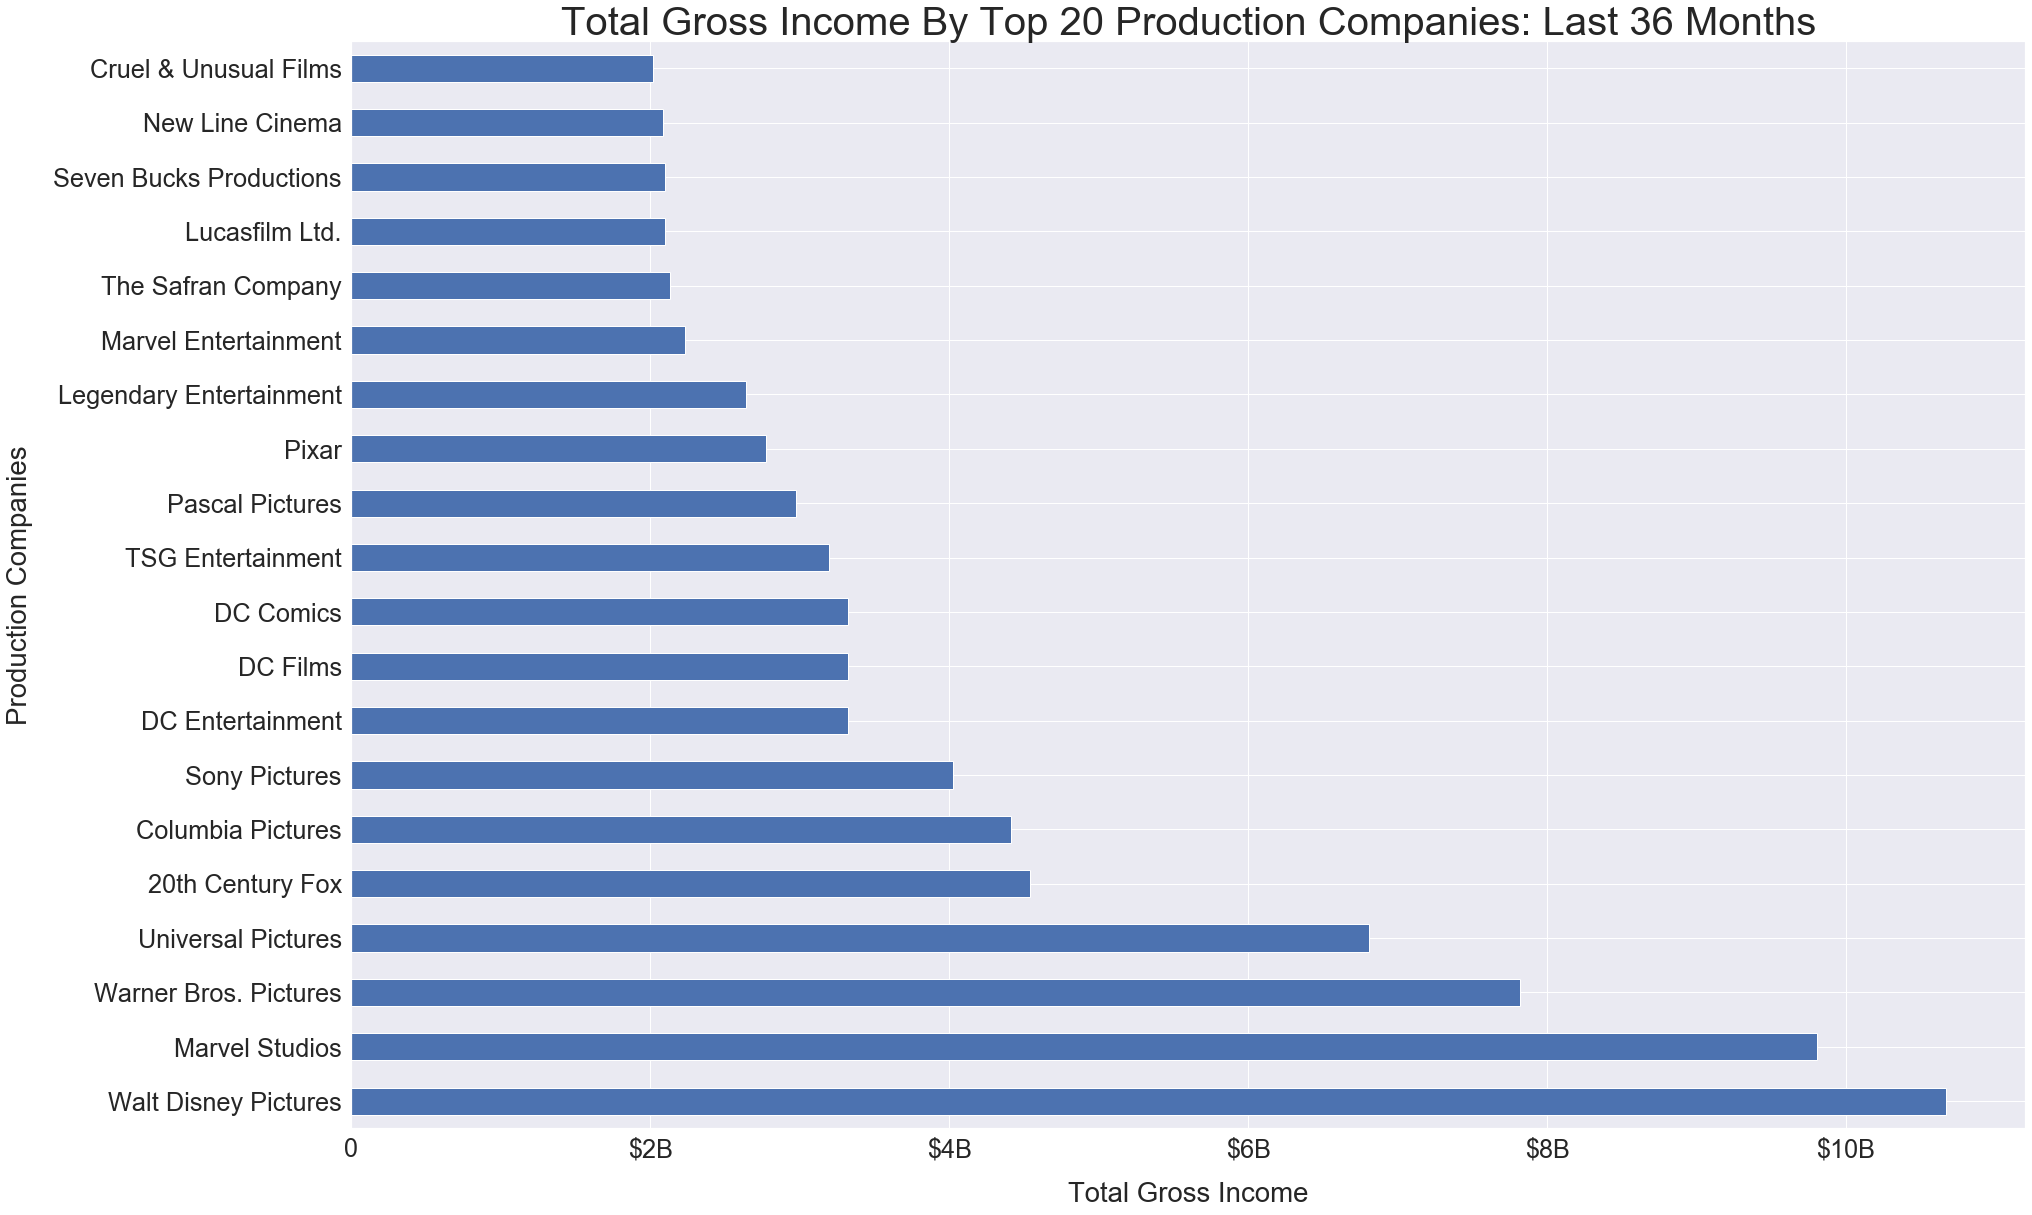

In [148]:
#Creating the visualization using Seaborn

fig,ax = plt.subplots()
sns.set(font_scale=2.5)
ctn.plot(kind='barh',figsize=(30,20),ax=ax)
plt.xlabel('Total Gross Income',labelpad=20)
plt.ylabel('Production Companies',labelpad=20)
plt.title('Total Gross Income By Top 20 Production Companies: Last 36 Months', y=1.0, fontsize=40)

#Removing the legend as I think it's unnecessary in this situation.
ax.legend().set_visible(False)
ax.xaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Now: In Which Genres Are These Films?

Now, I'd like to investigate which genres are most prevalent within the top-earning films, so as to combine with these insights showing the production companies that have been involved wit these "most successful" films in the last 3 years.

One thing the above chart reveals which is important: top, well-known major studios are not just blowing through capital, they appear to be profitable. Moreover, and perhaps to be expected: the production companies connected with the highest net income from the respective films are a cut above the rest.

It would be valuable to investigate the specific focus of these companies. It <i>appears that</i> films in the areas of comic book, Disney and Pixar <i>characters</i> could be prevalent on the list, but let's dig in more.

In [149]:
#Leveraging a list comprehension as before inside of a function to loop through the dataframe effectively.

def cool_func_genres(row):

    genres = [c['name'] for c in row['genres']]
    letsgo = {}
    genres_list = []
    
    for i in genres:
        letsgo[i] = 1
        genres_list.append(i)
        unique_genres_list = set(genres_list)
        #Just in case I need this later, creating a list of unique genres
        ugl = list(unique_genres_list)
            
    return letsgo

In [150]:
#Now, to use the Apply method to run the Function above, so as to populate the DataFrame.
genre_top_dict = grand_df.apply(lambda r: cool_func_genres(r), axis=1).to_list()
genre_top_dict

[{'Adventure': 1, 'Science Fiction': 1, 'Action': 1},
 {'Adventure': 1, 'Action': 1, 'Science Fiction': 1},
 {'Adventure': 1, 'Family': 1, 'Music': 1},
 {'Animation': 1, 'Family': 1, 'Adventure': 1},
 {'Action': 1, 'Adventure': 1, 'Fantasy': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Science Fiction': 1, 'Action': 1, 'Adventure': 1},
 {'Family': 1, 'Fantasy': 1, 'Romance': 1},
 {'Action': 1, 'Adventure': 1, 'Animation': 1, 'Family': 1},
 {'Crime': 1, 'Thriller': 1, 'Drama': 1},
 {'Action': 1, 'Crime': 1, 'Thriller': 1},
 {'Action': 1, 'Adventure': 1, 'Fantasy': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Action': 1, 'Animation': 1, 'Comedy': 1, 'Family': 1, 'Adventure': 1},
 {'Adventure': 1, 'Animation': 1, 'Comedy': 1, 'Family': 1, 'Fantasy': 1},
 {'Action': 1, 'Adventure': 1, 'Comedy': 1, 'Fantasy': 1},
 {'Adventure': 1, 'Fantasy': 1, 'Romance': 1, 'Family': 1},
 {'Drama': 1

In [151]:
#Now, I'll tally up the number of times each genre is mentioned within the last 36 months' top-earning film list.
genre_top_tot = pd.DataFrame(genre_top_dict).sum().sort_values(ascending=False)
genre_top_tot

Drama              96.0
Action             91.0
Thriller           74.0
Adventure          70.0
Comedy             61.0
Science Fiction    60.0
Fantasy            41.0
Horror             37.0
Crime              31.0
Romance            28.0
Mystery            25.0
Family             25.0
Animation          20.0
History            11.0
War                10.0
Music               5.0
dtype: float64

### Action, Drama + Thrillers FTW

Clearly, action and drama films are the most present in this list. Could going (mostly) all in on these two genres be the secret sauce to successful movie production? Although there are more aspects to consider to be sure, we can see that as it relates to the most income-positive films released in the last 36 months, action and drama take the cake.

OK, now to create a nice visualization. I'll use a variation of a Treemap I discovered.

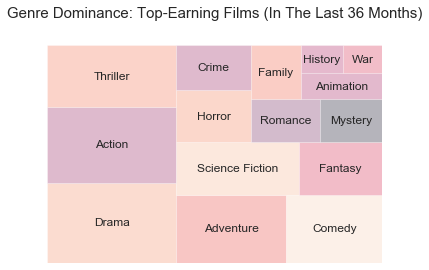

In [157]:
# Guidance obtained from these sources -- https://github.com/laserson/squarify 
#and https://python-graph-gallery.com/treemap/

x = 0
y = 0
width = 2000
height = 1250

#Removed the last 3 values in the dataframe to create well-organized visualization.
top_genre_viz = squarify.normalize_sizes(genre_top_tot.iloc[:15],width,height)
squarify.plot(sizes=top_genre_viz, label=genre_top_tot.index, alpha=.3, text_kwargs={'fontsize':12})

plt.title('Genre Dominance: Top-Earning Films (In The Last 36 Months)', y=1.1, fontsize=15)
plt.axis('off')
plt.show()

## Takeaway Update #1: Choose Action, Drama + Thriller Films With Confidence

The "Action" and "Drama" categories clearly stand out as it relates to films released in the last 36 months, and <i>investing</i> in producing these types of films seems to be a path worth exploring.

I thought that maybe <i>Animation</i> films would be higher with Walt Disney Studios being the top-earner (and it's worth delving deeper into which genre category Walt Disney specifically focuses on most, but the data does show that action films are most prevalent among the top-earners in the last 36 months!

---

##  🧗🏿 🌍 👨🏿‍🚀 Second Question:

## Is there a positive correlation between popularity and income in the last 36 months?

Now, my next goal is related to popularity and income. Without knowing <i>exactly</i> how each production company calculates its profits of course, the "net_income" column is what I've decided to use as a way to get a baseline sense. 

Since I've already done some cleaning for the last question related to net income, I'll review whether I can use some of the same code to find out more about the films with (arguably) the worst financial performance of the last 36 months, and whether these correlate to popularity scores.

I'll check on the entire list of films as well, to compare with the bottom-earners insights.

In [158]:
#Simple grouping that shows the net income for films released in the last 36 months.

simpl = grand_df.loc[:,['title','popularity','gross_income']].sort_values(by=['gross_income'],ascending=True)
simpl_for_plot = simpl.iloc[:100,:]
simpl_for_plot

title  popularity  gross_income
166                                The Irishman      28.566    -151000000
518                               6 Underground      20.699    -150000000
831          The Nutcracker and the Four Realms      18.271     -60477354
365  Journey to China: The Mystery of Iron Mask      22.941     -49000000
660                                      Shadow      19.486     -44005000
..                                          ...         ...           ...
778                                  Abominable      18.557      36615070
663                        Call Me by Your Name      19.448      37063475
176                                   Midsommar      28.159      38862188
642                 Sicario: Day of the Soldado      19.649      40836683
318                           Rambo: Last Blood      23.852      41490353

[100 rows x 3 columns]

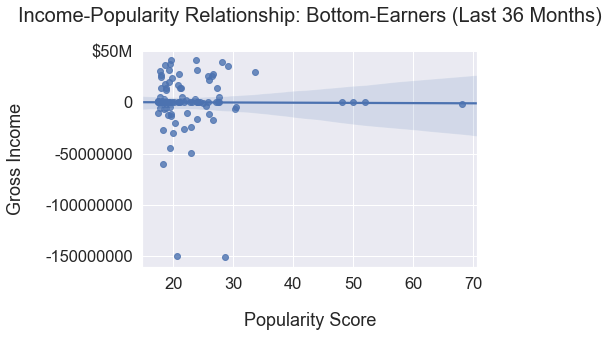

In [159]:
pop_net_neg = simpl_for_plot
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_neg["popularity"], y=pop_net_neg["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Bottom-Earners (Last 36 Months)', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## As Income Goes (Down) So Does Popularity?

OK! So, it seems that poplularity score and income have a positive correlation, at least with respect to films released in the last 36 months. However, to further cement the correlation, we would need to see a similar positive correlation with the top-earning films as well. Let's take a look.

In [57]:
#Reversing the sorting from the previous simpl variable

simpl_top = grand_df.loc[:,['title','popularity','gross_income']].sort_values(by=['gross_income'],ascending=False)
simpl_top.head(20)

title  popularity  gross_income
76                  Avengers: Endgame      36.649    2441800564
6              Avengers: Infinity War      84.160    1746239637
51                      The Lion King      39.594    1396943394
49                          Frozen II      41.645    1300026933
93                      Black Panther      34.332    1146739107
206    Jurassic World: Fallen Kingdom      26.835    1133459585
259          Star Wars: The Last Jedi      25.232    1132539889
269              Beauty and the Beast      25.002    1103521126
247                     Incredibles 2      25.617    1042805359
5                               Joker      86.008    1019251311
552           The Fate of the Furious      20.431     988764765
226                           Aquaman      26.266     988461807
59                     Captain Marvel      38.864     976274794
23          Spider-Man: Far from Home      58.576     971927996
771                   Despicable Me 3      18.603     951552585
165                       Toy Story 4      28.577     898394593
992    Jumanji: Welcome to the Jungle      17.406     872102237
67                            Aladdin      38.127     864612394
193                 Bohemian Rhapsody      27.379     842027543
43   Star Wars: The Rise of Skywalker      44.478     824144248

[Text(0, 0.5, '')]

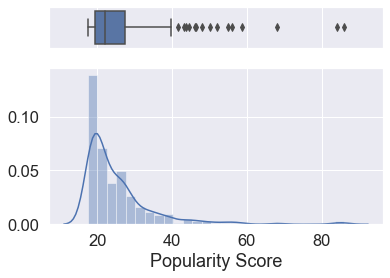

In [58]:
f, (xax_box, xax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .95)})
 
# Add a graph in each part
sns.boxplot(simpl_top["popularity"], ax=xax_box)
sns.distplot(simpl_top["popularity"], ax=xax_hist)
 
# Remove x axis name for the boxplot
xax_box.set(xlabel='')
xax_hist.set(xlabel='Popularity Score')
xax_hist.set(ylabel='')

## High Popularity Scores Are Rare, And That's Good For Business

Here we see that very few films have a popularity score of 50 or higher. But, of course this doesn't mean the film wasn't popular. However, what's more important perhaps is that the data shows something else!

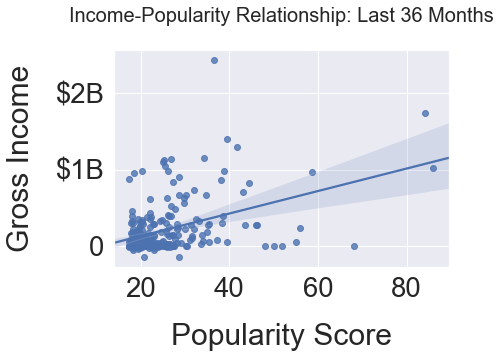

In [59]:
#Now, time to create the second scatterplot.

pop_net_pos = simpl_top
sns.set(font_scale=2.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_pos["popularity"], y=pop_net_pos["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Last 36 Months', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Takeaway #2: More Money More (Popularity) Problems? It Depends.

Interestingly enough, it looks like there's a slightly positive correlation between income and popularity scores. However, one can see above that it's <i>more than possible</i> for a film to rake in a significant amount of money <b>without</b> receiving a high popularity score within TMDb.

---

## 🧗🏿 🌍 👨🏿‍🚀 Third Question:

### Which originally non-English language films have had the most success, and ultimately, what's the most "income-positive" country according to the data?

It seems that a good popularity score is difficult to come by. But, what about for non-English language films? For this question, I'd like to investigate how popular non-English language films have done. The goal is to be able to compare with the main insights I've gathered so far.

The first thing I'll do is obtain the proper dataframe.

In [60]:
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
4    False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg   
..     ...                               ...   
995  False  /5iiVfPS6LsAqmVQVOzhyCHhCFgU.jpg   
996  False  /301KcFm1GL3yaTGOO25I0MeAy0W.jpg   
997  False  /fZBQOScjDT8TAipEyCkLVeDTu5c.jpg   
998  False  /6zKbGvoCrnUuDnTqXJ0laUdWAhd.jpg   
999  False  /v2vnLsMZmi1pB3C81c3HfHoA4ZW.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None  24000000   
..                                                 ...       ...   
995                                               None  30000000   
996  {'id': 59567, 'name': 'Shanghai Noon Collectio...  55000000   
997                                               None         0   
998                                               None  50000000   
999                                               None  38000000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4    [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   
..                                                 ...   
995  [{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
997  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
998  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
999  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   

                                         homepage      id     imdb_id  \
0             http://www.netflix.com/projectpower  605116   tt7550000   
1                                                  703771  tt12876132   
2          https://www.netflix.com/title/81252403  726664   tt8675288   
3    https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
4                                                  454433   tt3979300   
..                                            ...     ...         ...   
995    http://www.discoverthecabininthewoods.com/   22970   tt1259521   
996                                                  8584   tt0184894   
997        https://www.netflix.com/title/80994878  707886  tt10714856   
998                                                  1272   tt0448134   
999                 http://www.push-themovie.com/   13455   tt0465580   

    original_language                              original_title  \
0                  en                               Project Power   
1                  en  Deathstroke: Knights & Dragons - The Movie   
2                  en                                    Fearless   
3                  ru                                     Спутник   
4                  en                                  Magic Camp   
..                ...                                         ...   
995                en                      The Cabin in the Woods   
996                en                               Shanghai Noon   
997                en                               Feel the Beat   
998                en                                    Sunshine   
999                en                                        Push   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     271.572   
1    Ten years ago, Slade Wilson-aka the super-assa...     128.317  

In [61]:
#Organize (or, group) the movie list according to the original language

non_eng = pd.DataFrame(newshaq)
non_eng_checker = ~non_eng.original_language.str.contains('en')
non_eng_df = non_eng[non_eng_checker]
non_eng_df.sort_values('gross_income',ascending=False)

adult                     backdrop_path  \
351  False  /bGksau9GGu0uJ8DJQ8DYc9JW5LM.jpg   
158  False  /mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg   
156  False  /Ab8mkHmkYADjU7wQiOkia9BzGvS.jpg   
24   False  /ApiBzeaa95TNYliSbQ8pJv4Fje7.jpg   
474  False  /iuFbU5jiNh8DAxLBGifZCvv3KmB.jpg   
..     ...                               ...   
641  False  /6WQRWA9PlQwVLCpUGt5jgIfRrwT.jpg   
145  False  /pLHeRaGgy2e9qeTviZZfbWYqZ3s.jpg   
174  False  /aWsVwgG324dFQS5xHEjB7OCOT9w.jpg   
660  False  /neJywSBozU8mhBu04K4jO9Hxf0J.jpg   
365  False  /mPPj0OXBP7uokY1hjkgdb13jhTY.jpg   

                                 belongs_to_collection    budget  \
351                                               None  13000000   
158                                               None         0   
156                                               None  19000000   
24                                                None  11363000   
474                                               None  24000000   
..                                                 ...       ...   
641                                               None  11329550   
145                                               None  12000000   
174  {'id': 619537, 'name': 'Train to Busan Collect...  17000000   
660                                               None  44005000   
365  {'id': 428046, 'name': 'Viy Collection', 'post...  49000000   

                                                genres  \
351  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...   
158  [{'id': 10749, 'name': 'Romance'}, {'id': 16, ...   
156  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
24   [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
474  [{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...   
..                                                 ...   
641  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
145  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
174  [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   
660  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
365  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   

                                              homepage      id     imdb_id  \
351                                                      77338   tt1675434   
158    https://www.funimationfilms.com/movie/yourname/  372058   tt5311514   
156             http://movies.disney.com/spirited-away     129   tt0245429   
24                     https://www.parasite-movie.com/  496243   tt6751668   
474                                                       4935   tt0347149   
..                                                 ...     ...         ...   
641  http://www.marsfilms.com/film/dapres-une-histo...  416051   tt5893264   
145                                                     581526  tt12763920   
174  https://www.wellgousa.com/films/train-to-busan...  581392   tt8850222   
660                                                     463319   tt6864046   
365  https://www.defiant-ent.com/product/the-iron-m...  428045   tt6218010   

    original_language              original_title  \
351                fr                Intouchables   
158                ja                       君の名は。   
156                ja                    千と千尋の神隠し   
24                 ko                         기생충   
474                ja                     ハウルの動く城   
..                ...                         ...   
641                fr  D'après une histoire vraie   
145                ko                 다만 악에서 구하소서   
174                ko                          반도   
660                zh                           影   
365                ru        Тайна Печати дракона   

                                              overview  popularity  \
351  A true story of two men who should never have ...      23.196   
158  High schoolers Mitsuha and Taki are complete s...      29.008   
156  A young girl, Chihiro, becomes trapped in a st...      29.070   
24   All unemployed, Ki-taek's family takes peculia...      

In [62]:
ne_df = non_eng_df.loc[:,['title','popularity','original_language','release_date','gross_income']].sort_values(by=['gross_income'],ascending=False)
ne_df

title  popularity original_language  \
351                            The Intouchables      23.196                fr   
158                                  Your Name.      29.008                ja   
156                               Spirited Away      29.070                ja   
24                                     Parasite      55.969                ko   
474                        Howl's Moving Castle      21.203                ja   
..                                          ...         ...               ...   
641                       Based on a True Story      19.660                fr   
145                        Deliver Us from Evil      29.813                ko   
174                                   Peninsula      28.327                ko   
660                                      Shadow      19.486                zh   
365  Journey to China: The Mystery of Iron Mask      22.941                ru   

    release_date  gross_income  
351   2011-11-02     413480871  
158   2016-08-26     357986087  
156   2001-07-20     255925095  
24    2019-05-30     234561070  
474   2004-11-19     212049757  
..           ...           ...  
641   2017-11-01     -11329550  
145   2020-08-05     -12000000  
174   2020-07-15     -17000000  
660   2018-09-30     -44005000  
365   2019-08-16     -49000000  

[75 rows x 5 columns]

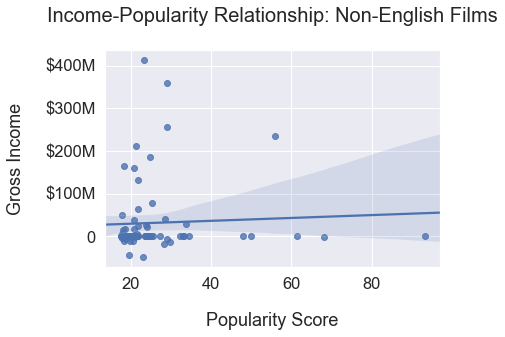

In [160]:
pop_net_non_eng = ne_df
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_non_eng["popularity"], y=pop_net_non_eng["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Non-English Films', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

In [161]:
lang_money = newshaq.groupby(['original_language'])['gross_income'].sum().sort_values(ascending=False)
lang_money

original_language
en    186489452152
ja      1416392721
fr       562226328
ko       284288588
es       119573219
sv        39498108
it        28095034
de         4983582
pl               0
id               0
hi               0
fi               0
pt           -1000
da        -5256817
ru       -12923983
zh       -54005000
Name: gross_income, dtype: int64

In [65]:
def cool_func_langs(row):

    num_of_langs = [l['name'] for l in row['spoken_languages']]
    letsgo = {}
    num_of_lang_list = []
    
    for i in num_of_langs:
        if i != '':
            letsgo[i] = 1
            
    return letsgo

In [66]:
lang_sum = newshaq.apply(lambda r: cool_func_langs(r), axis=1).to_list()
lang_sum

[{'English': 1, 'Português': 1},
 {'Français': 1, 'English': 1, 'Português': 1},
 {'English': 1},
 {'Pусский': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'Română': 1, 'English': 1, 'Deutsch': 1, 'Pусский': 1},
 {'English': 1},
 {'English': 1},
 {'Pусский': 1},
 {'English': 1, '日本語': 1, 'Français': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1, '普通话': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'日本語': 1},
 {'English': 1},
 {'English': 1, 'Italiano': 1, 'Pусский': 1, 'العربية': 1, 'Français': 1},
 {'Český': 1, 'Nederlands': 1, 'English': 1, 'Deutsch': 1, 'Italiano': 1},
 {'English': 1, 'Deutsch': 1, '한국어/조선말': 1},
 {'English': 1, 'Italiano': 1},
 {'English': 1, 'Norsk': 1},
 {'English': 1},
 {'English': 1, 'हिन्दी': 1, 'Italiano': 1, '日本語': 1},
 {'Español': 1, 'English': 1},
 {'English': 1},
 {'Français': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'한국어/조선말': 1},
 {'English': 1},
 {'English': 1},
 {'Español'

In [67]:
lang_sum_list = []
for l in lang_sum:
    lang_sum_list.append(len(l))

lang_sum_list

[2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 3,
 2,
 2,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 0,
 1,
 2,
 0,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 4,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 6,
 1,
 1,
 1,
 3,
 2,
 1,
 4,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 2,
 1,
 1,
 5,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 2,
 1,


In [68]:
lang_sum_df_col = pd.DataFrame(lang_sum_list,columns=['number_of_languages'])
lang_sum_df_col

number_of_languages
0                      2
1                      3
2                      1
3                      1
4                      1
..                   ...
995                    1
996                    3
997                    2
998                    1
999                    1

[1000 rows x 1 columns]

In [69]:
major_df = pd.concat([newshaq, lang_sum_df_col], axis=1)
major_df.head()

adult                     backdrop_path belongs_to_collection    budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
1  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   
2  False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None         0   
3  False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None         0   
4  False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg                  None  24000000   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4  [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   

                                       homepage      id     imdb_id  \
0           http://www.netflix.com/projectpower  605116   tt7550000   
1                                                703771  tt12876132   
2        https://www.netflix.com/title/81252403  726664   tt8675288   
3  https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
4                                                454433   tt3979300   

  original_language                              original_title  \
0                en                               Project Power   
1                en  Deathstroke: Knights & Dragons - The Movie   
2                en                                    Fearless   
3                ru                                     Спутник   
4                en                                  Magic Camp   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     271.572   
1  Ten years ago, Slade Wilson-aka the super-assa...     128.317   
2  A teen gamer is forced to level up to full-tim...     108.786   
3  At the height of the Cold War, a Soviet spacec...      93.255   
4  Andy, at the urging of his former mentor and M...      92.534   

                        poster_path  \
0  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg   
1  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
2  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg   
3  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg   
4  /awcPLFFYjufRXd2oAAP6ZIXF9vM.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
2  [{'id': 81139, 'logo_path': None, 'name': 'Van...   
3  [{'id': 100821, 'logo_path': None, 'name': 'Vo...   
4  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   
2           [{'iso_3166_1': 'CA', 'name': 'Canada'}]   2020-08-14        0   
3           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   2020-07-14        0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   

   runtime                                   spoken_languages    status  \
0    113.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1     87.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
2     89.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3    113.0           [{'iso_639_1': 'ru', 'name': 'Pусский'}]  Released   
4    100.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  What would you risk for five minutes of pure p...   
1  Never give a paid killer a reason to work for ...   
2                                                      
3          The only survivor did not come back alone   
4                             Welcome to Magic Camp!   

                                        title  video  vote_average  \
0                               Project Power  False       

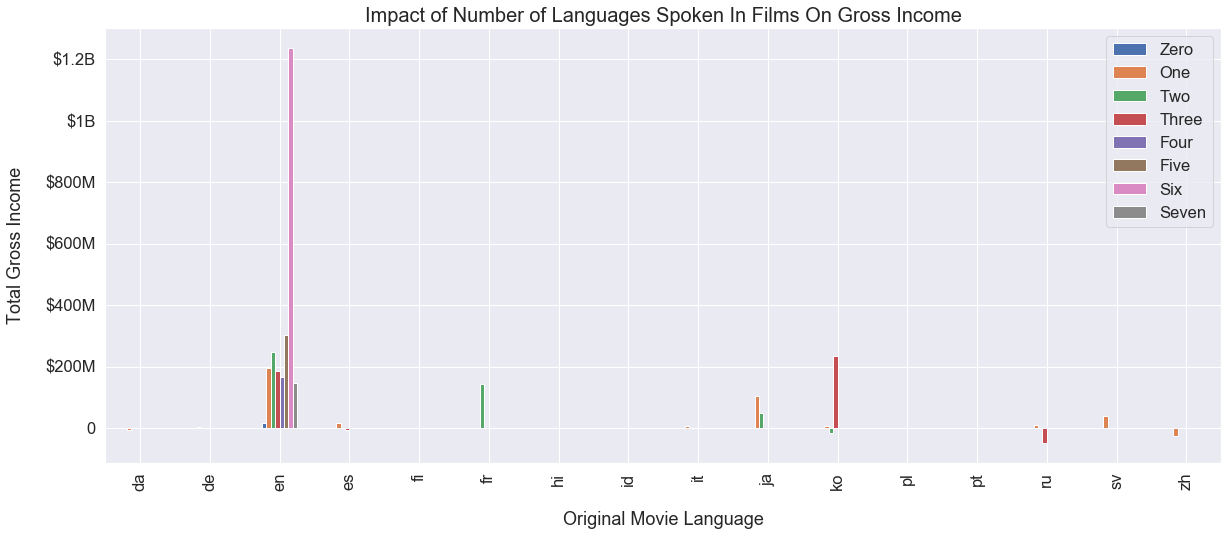

In [72]:
mdflang = major_df.groupby(['original_language','number_of_languages'])['gross_income'].mean().unstack()
mdflang = mdflang.where(pd.notnull(mdflang), None)
mdflang.columns = ['Zero','One','Two','Three','Four','Five','Six','Seven']

fig, ax = plt.subplots(figsize=(20,8))
mdflang.plot(kind='bar',ax=ax)


sns.set(font_scale=1.5)

plt.xlabel('Original Movie Language',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Impact of Number of Languages Spoken In Films On Gross Income', y=1.0, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
ax.legend().set_visible(True)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))


plt.show()

## Takeaway #3: English Films With Many Languages Spoken In Film = $$$

What's clear from the data here is that -- over time -- the films which have English as their original language and <b>also</b> have other languages being spoken in the film are by and large the top earners.

We can even see that as the number of languages spoken in the originally-English-speaking films goes up, the net income goes up as well!

## 🧗🏿 🌍 👨🏿‍🚀 Fourth Question:

### How do films that belong to collections fare compared to films not apart of collections?

Now, what I'll do next is investigate films that are part of collections. I've noticed a decent amount of collections in the dataset and I'm curious how these films fare compared to the others.

In [73]:
#First, to look at the dataset again to refresh!
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
4    False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg   
..     ...                               ...   
995  False  /5iiVfPS6LsAqmVQVOzhyCHhCFgU.jpg   
996  False  /301KcFm1GL3yaTGOO25I0MeAy0W.jpg   
997  False  /fZBQOScjDT8TAipEyCkLVeDTu5c.jpg   
998  False  /6zKbGvoCrnUuDnTqXJ0laUdWAhd.jpg   
999  False  /v2vnLsMZmi1pB3C81c3HfHoA4ZW.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None  24000000   
..                                                 ...       ...   
995                                               None  30000000   
996  {'id': 59567, 'name': 'Shanghai Noon Collectio...  55000000   
997                                               None         0   
998                                               None  50000000   
999                                               None  38000000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4    [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   
..                                                 ...   
995  [{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...   
996  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
997  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
998  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
999  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   

                                         homepage      id     imdb_id  \
0             http://www.netflix.com/projectpower  605116   tt7550000   
1                                                  703771  tt12876132   
2          https://www.netflix.com/title/81252403  726664   tt8675288   
3    https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
4                                                  454433   tt3979300   
..                                            ...     ...         ...   
995    http://www.discoverthecabininthewoods.com/   22970   tt1259521   
996                                                  8584   tt0184894   
997        https://www.netflix.com/title/80994878  707886  tt10714856   
998                                                  1272   tt0448134   
999                 http://www.push-themovie.com/   13455   tt0465580   

    original_language                              original_title  \
0                  en                               Project Power   
1                  en  Deathstroke: Knights & Dragons - The Movie   
2                  en                                    Fearless   
3                  ru                                     Спутник   
4                  en                                  Magic Camp   
..                ...                                         ...   
995                en                      The Cabin in the Woods   
996                en                               Shanghai Noon   
997                en                               Feel the Beat   
998                en                                    Sunshine   
999                en                                        Push   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     271.572   
1    Ten years ago, Slade Wilson-aka the super-assa...     128.317  

In [162]:
newshaq_sum = newshaq.loc[:,['belongs_to_collection','gross_income','original_language','vote_average','vote_count']].sort_values(by='gross_income', ascending=False)
newshaq_sum

belongs_to_collection  gross_income  \
107  {'id': 87096, 'name': 'Avatar Collection', 'po...    2550965087   
76   {'id': 86311, 'name': 'The Avengers Collection...    2441800564   
159                                               None    1987463944   
162  {'id': 10, 'name': 'Star Wars Collection', 'po...    1823223624   
6    {'id': 86311, 'name': 'The Avengers Collection...    1746239637   
..                                                 ...           ...   
518                                               None    -150000000   
166                                               None    -151000000   
65                                                None    -200000000   
19                                                None    -205000000   
388  {'id': 645, 'name': 'James Bond Collection', '...    -242000000   

    original_language  vote_average  vote_count  
107                en           7.4       21857  
76                 en           8.3       14629  
159                en           7.9       17522  
162                en           7.4       14815  
6                  en           8.3       19343  
..                ...           ...         ...  
518                en           6.3        2439  
166                en           7.7        3856  
65                 en           0.0           0  
19                 en           0.0           0  
388                en           0.0           0  

[1000 rows x 5 columns]

In [163]:
newshaq_less = newshaq.dropna(subset = ['belongs_to_collection','poster_path'])
newshaq_less = newshaq_less.loc[:,['belongs_to_collection','gross_income','original_language','vote_average','vote_count']].sort_values(by='gross_income', ascending=False)
newshaq_less

belongs_to_collection  gross_income  \
107  {'id': 87096, 'name': 'Avatar Collection', 'po...    2550965087   
76   {'id': 86311, 'name': 'The Avengers Collection...    2441800564   
162  {'id': 10, 'name': 'Star Wars Collection', 'po...    1823223624   
6    {'id': 86311, 'name': 'The Avengers Collection...    1746239637   
550  {'id': 328, 'name': 'Jurassic Park Collection'...    1521713208   
..                                                 ...           ...   
566  {'id': 731067, 'name': 'Bird Box Collection', ...     -19800000   
411  {'id': 732461, 'name': '47 Ronin Collection', ...     -24037525   
130  {'id': 135179, 'name': 'Sin City Collection', ...     -25592384   
365  {'id': 428046, 'name': 'Viy Collection', 'post...     -49000000   
388  {'id': 645, 'name': 'James Bond Collection', '...    -242000000   

    original_language  vote_average  vote_count  
107                en           7.4       21857  
76                 en           8.3       14629  
162                en           7.4       14815  
6                  en           8.3       19343  
550                en           6.6       15902  
..                ...           ...         ...  
566                en           6.9        6788  
411                en           6.1        2538  
130                en           6.3        2695  
365                ru           6.2         147  
388                en           0.0           0  

[377 rows x 5 columns]

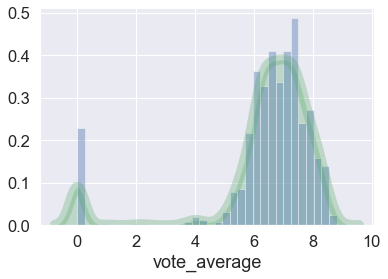

In [164]:
sns.distplot(a = newshaq_sum["vote_average"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

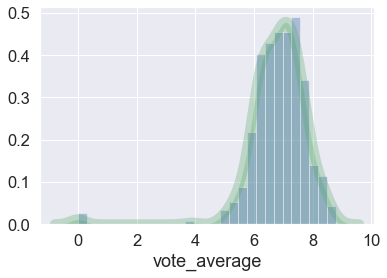

In [165]:
sns.distplot(a = newshaq_less["vote_average"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

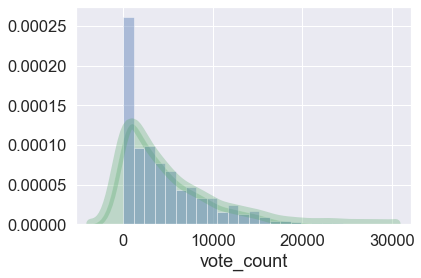

In [166]:
sns.distplot(a = newshaq_sum["vote_count"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

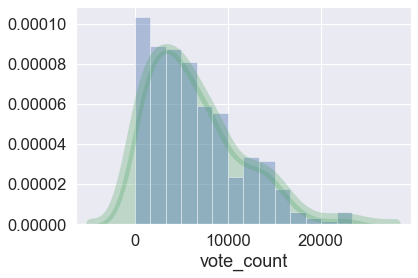

In [167]:
sns.distplot(a = newshaq_less["vote_count"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

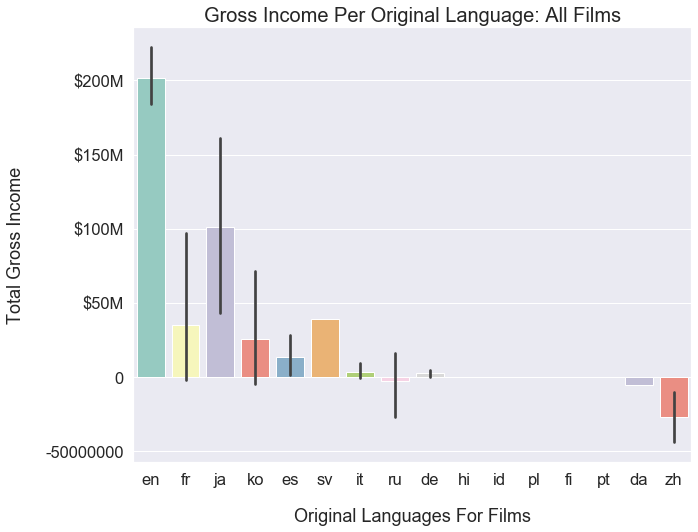

In [168]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=newshaq_sum, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: All Films', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

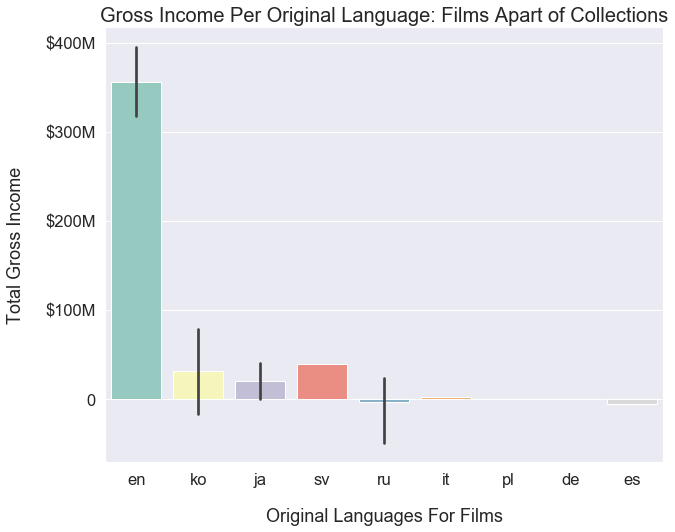

In [169]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=newshaq_less, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: Films Apart of Collections', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

In [170]:
newshaq_sum_2 = newshaq.loc[:,['belongs_to_collection','gross_income']].sort_values(by='gross_income', ascending=False).sum()
newshaq_sum_2

gross_income    188872322932
dtype: int64

In [171]:
newshaq_less = newshaq.dropna(subset = ['belongs_to_collection','poster_path'])
newshaq_less_2 = newshaq_less.loc[:,['belongs_to_collection','gross_income']].sort_values(by='gross_income', ascending=False).sum()
newshaq_less_2

gross_income    129245768409
dtype: int64

In [172]:
collections_diff = sum(newshaq_sum_2) - sum(newshaq_less_2)
print(f'Total gross income without films apart of a collection included is: ${float(collections_diff)}')
print('That is north of $59 billion USD')

Total gross income without films apart of a collection included is: $59626554523.0
That is north of $59 billion USD


In [173]:
collections_makeup = newshaq_less_2 / newshaq_sum_2
print(f'Films apart of collections makeup {float(collections_makeup)} of the total gross income!')
print('That is more than 2/3!')

Films apart of collections makeup 0.684302318109004 of the total gross income!
That is more than 2/3!


## Takeaway #4: Collections Make Sense...As Long As They Are English-Speaking?

It's pretty interesting to see that films apart of collections account for such a large portion of the income. But, this isn't surprising, either. All in all, the voting averages are similar, with a bit of a nod towards films apart of collections.

---

## 🧗🏿 🌍 👨🏿‍🚀 Increase To 3000 Titles: A Comparison

To end, I'll use the API to access TMDb once more, but this time I'll retrieve 3000 titles, and then what I'd like to do is do some comparative analysis to see if the one trend matches or is similar with those I discovered for the 1000 titles!

In [87]:
three_k = []

for i in (range(1,151)):
    if i%15 == 0:
        time.sleep(7)
    doop = a.popular(page=i)['results']
    three_k.extend(doop)

print(doop[1]['title'])
print(three_k[1]['title'])
len(three_k)

The Man from Earth
Deathstroke: Knights & Dragons - The Movie


3000

In [174]:
three_k_ids = []
for i in three_k:
    three_k_ids.append(i['id'])
print(three_k_ids[0:20])

[605116, 703771, 726664, 594718, 454433, 475557, 299536, 612706, 521034, 271110, 579583, 587792, 430155, 27205, 517412, 87101, 495764, 583083, 385103, 577922]


In [175]:
print(three_k[5]['id'])
print(len(three_k_ids))

475557
3000


In [104]:
three_k_df = []

for k in three_k_ids:
    movie = tmdb.Movies(k)
    response = movie.info()
    three_k_df.append(response)

In [176]:
len(three_k_df)

3000

In [185]:
three_df = pd.DataFrame(three_k_df)
three_df

adult                     backdrop_path belongs_to_collection    budget  \
0     False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
1     False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   
2     False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None         0   
3     False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None         0   
4     False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg                  None  24000000   
...     ...                               ...                   ...       ...   
2995  False  /3jKynKnUtRERxBFAcvZ8AvkTo4c.jpg                  None  48000000   
2996  False  /sOhtC4cmaYPOlcjXCWxxrx2NKKn.jpg                  None  25000000   
2997  False  /9yepEBnQNcKzWWyHdUiX8Mnqc6U.jpg                  None         0   
2998  False   /ZFhKJJvSFU9fGfvpWXffQZT80b.jpg                  None  32000000   
2999  False  /mGyMkoip5CpfcfNNQFIiuoIQkKb.jpg                  None         0   

                                                 genres  \
0     [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1     [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2     [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3     [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4     [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   
...                                                 ...   
2995  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2996                      [{'id': 18, 'name': 'Drama'}]   
2997                      [{'id': 18, 'name': 'Drama'}]   
2998  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2999                [{'id': 99, 'name': 'Documentary'}]   

                                          homepage      id     imdb_id  \
0              http://www.netflix.com/projectpower  605116   tt7550000   
1                                                   703771  tt12876132   
2           https://www.netflix.com/title/81252403  726664   tt8675288   
3     https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
4                                                   454433   tt3979300   
...                                            ...     ...         ...   
2995                                                535167   tt7605074   
2996                https://www.beautifulboy.movie  451915   tt1226837   
2997                                                 19426   tt0050783   
2998                                                  9294   tt0117333   
2999                                                566222   tt4736550   

     original_language                              original_title  \
0                   en                               Project Power   
1                   en  Deathstroke: Knights & Dragons - The Movie   
2                   en                                    Fearless   
3                   ru                                     Спутник   
4                   en                                  Magic Camp   
...                ...                                         ...   
2995                zh                                        流浪地球   
2996                en                               Beautiful Boy   
2997                it                         Le notti di Cabiria   
2998                en                                  Phenomenon   
2999                en                              The Great Hack   

                                               overview  popularity  \
0     An ex-soldier, a teen and a cop collide in New...     271.572   
1     Ten years ago, Slade Wilson-aka the super-assa...     128.317   
2     A teen gamer is forced to level up to full-tim...     108.786   
3     At the height of the Cold War, a Soviet spacec...      93.255   
4     Andy, at the urging of his former mentor and M...      92.534   
...                                                 ...         ...   
2995  When the Sun begins to expand in such a way th...      12.946   
2996  After he and his fir

In [ ]:
# Gross income top production companies

In [186]:
three_df['gross_income'] = (three_df.loc[:,'revenue'] - three_df.loc[:,'budget'])
three_df['gross_income'] = three_df['gross_income'].astype('int64')
three_df

adult                     backdrop_path belongs_to_collection    budget  \
0     False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
1     False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   
2     False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None         0   
3     False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None         0   
4     False  /mZgbq4Zpxz7ozWXl4asj6vNdlIi.jpg                  None  24000000   
...     ...                               ...                   ...       ...   
2995  False  /3jKynKnUtRERxBFAcvZ8AvkTo4c.jpg                  None  48000000   
2996  False  /sOhtC4cmaYPOlcjXCWxxrx2NKKn.jpg                  None  25000000   
2997  False  /9yepEBnQNcKzWWyHdUiX8Mnqc6U.jpg                  None         0   
2998  False   /ZFhKJJvSFU9fGfvpWXffQZT80b.jpg                  None  32000000   
2999  False  /mGyMkoip5CpfcfNNQFIiuoIQkKb.jpg                  None         0   

                                                 genres  \
0     [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1     [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2     [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3     [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
4     [{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...   
...                                                 ...   
2995  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2996                      [{'id': 18, 'name': 'Drama'}]   
2997                      [{'id': 18, 'name': 'Drama'}]   
2998  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2999                [{'id': 99, 'name': 'Documentary'}]   

                                          homepage      id     imdb_id  \
0              http://www.netflix.com/projectpower  605116   tt7550000   
1                                                   703771  tt12876132   
2           https://www.netflix.com/title/81252403  726664   tt8675288   
3     https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
4                                                   454433   tt3979300   
...                                            ...     ...         ...   
2995                                                535167   tt7605074   
2996                https://www.beautifulboy.movie  451915   tt1226837   
2997                                                 19426   tt0050783   
2998                                                  9294   tt0117333   
2999                                                566222   tt4736550   

     original_language                              original_title  \
0                   en                               Project Power   
1                   en  Deathstroke: Knights & Dragons - The Movie   
2                   en                                    Fearless   
3                   ru                                     Спутник   
4                   en                                  Magic Camp   
...                ...                                         ...   
2995                zh                                        流浪地球   
2996                en                               Beautiful Boy   
2997                it                         Le notti di Cabiria   
2998                en                                  Phenomenon   
2999                en                              The Great Hack   

                                               overview  popularity  \
0     An ex-soldier, a teen and a cop collide in New...     271.572   
1     Ten years ago, Slade Wilson-aka the super-assa...     128.317   
2     A teen gamer is forced to level up to full-tim...     108.786   
3     At the height of the Cold War, a Soviet spacec...      93.255   
4     Andy, at the urging of his former mentor and M...      92.534   
...                                                 ...         ...   
2995  When the Sun begins to expand in such a way th...      12.946   
2996  After he and his fir

In [188]:
three_df_simpl = three_df.loc[:,['title','popularity','belongs_to_collection','original_language','gross_income']].sort_values(by=['gross_income'],ascending=False)
three_df_simpl

title  popularity  \
107                         Avatar      33.317   
76               Avengers: Endgame      36.649   
159                        Titanic      28.863   
162   Star Wars: The Force Awakens      28.846   
6           Avengers: Infinity War      84.160   
...                            ...         ...   
1514               The Lone Ranger      15.530   
2685  Mowgli: Legend of the Jungle      13.347   
65                           Mulan      38.307   
19                           Tenet      61.415   
388                 No Time to Die      22.466   

                                  belongs_to_collection original_language  \
107   {'id': 87096, 'name': 'Avatar Collection', 'po...                en   
76    {'id': 86311, 'name': 'The Avengers Collection...                en   
159                                                None                en   
162   {'id': 10, 'name': 'Star Wars Collection', 'po...                en   
6     {'id': 86311, 'name': 'The Avengers Collection...                en   
...                                                 ...               ...   
1514                                               None                en   
2685                                               None                en   
65                                                 None                en   
19                                                 None                en   
388   {'id': 645, 'name': 'James Bond Collection', '...                en   

      gross_income  
107     2550965087  
76      2441800564  
159     1987463944  
162     1823223624  
6       1746239637  
...            ...  
1514    -165710090  
2685    -175000000  
65      -200000000  
19      -205000000  
388     -242000000  

[3000 rows x 5 columns]

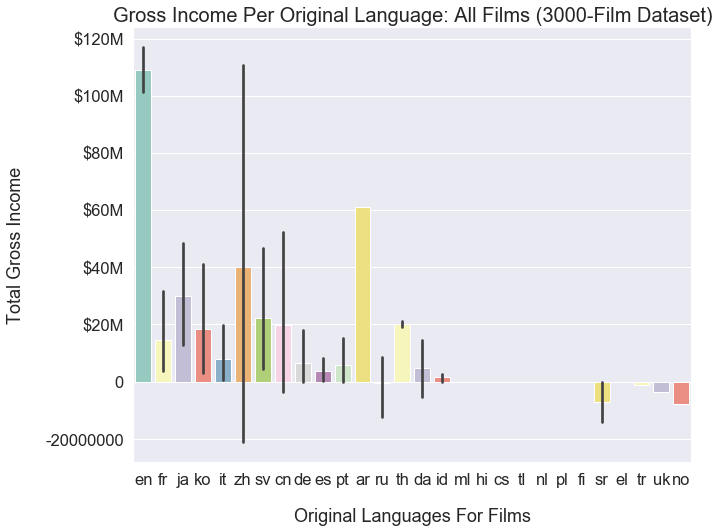

In [189]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=three_df_simpl, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: All Films (3000-Film Dataset)', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

## 🧗🏿 🌍 👨🏿‍🚀 Summary + Recommendations:

1. Consider producing films that are or could be apart of collections.
2. Produce films that consist of at least 4 languages being spoken in the film.
3. Invest in the production of films whose original language is Slovenian, Korean or Japanese.
4. Go with action, drama or thriller film production.
5. Take on potentially polarizing film productions (while adhering to other recommendations).

### Further Research To Consider:

1. Getting insight into what films are currently in production and comparing details with the history of production company investment and film performance.
2. How do metrics like "popularity" and "vote count" relate to the potential amount of time a customer would spend within a streaming / online movie watching platform? And, how would gaining this "consumer attention" translate to cash inflow in other areas?